# Tutorial 01 - Calculating Magnitudes of Evoked Compound Action Potentials

We have included several methods to allow the user to calculate the magnitude of an action potential.  This is intedended to be an intermediate step with the end goal being to establish dose response curves plotting the magnitude of response against the amplitude of stimulation.

In [2]:
import pyeCAP
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_context("paper")

c:\users\malal\documents\witne\pycap\pyecap\pyeCAP\io\ripple_io.py:13: UserWarning: No Neuroshare package found, Ripple files will not work
  warnings.warn("No Neuroshare package found, Ripple files will not work")


#### Set the file_location to the included sample data and import data using the Ephys class.
Note: You'll see some additional variables here that account for the delay between the onset of the recording and the onset of the stimulus.

In [4]:
file_location = tdt_tanks = r"C:\Users\malal\Documents\WITNE\pyCAP\TutorialExamples\pnpig191126-191204-151801"
data_ephys = pyeCAP.Ephys(data=file_location, stores=['RawE', 'RawG'])

read from t=0s to t=153.36s


#### Groom  & Filter the Data

In [5]:
# Groom Data
data_ephys = data_ephys.remove_ch('RawG 4')
rec_ch_names = ['LIFE 1', 'LIFE 2', 'LIFE 3', 'LIFE 4', 'EMG 1', 'EMG 2', 'EMG 3']
rec_ch_types = ['LIFE', 'LIFE', 'LIFE', 'LIFE', 'EMG', 'EMG', 'EMG']
data_ephys = data_ephys.set_ch_names(rec_ch_names)
data_ephys = data_ephys.set_ch_types(rec_ch_types)

# Filter Data
data_ephys = data_ephys.filter_powerline()
data_ephys = data_ephys.filter_median(btype='highpass')
data_ephys = data_ephys.filter_gaussian(Wn=4000, btype='lowpass')

C:\Users\malal\anaconda3\envs\pyeCAP\lib\site-packages\dask-2021.7.1-py3.7.egg\dask\array\overlap.py:633: FutureWarning: The use of map_overlap(array, func, **kwargs) is deprecated since dask 2.17.0 and will be an error in a future release. To silence this warning, use the syntax map_overlap(func, array0,[ array1, ...,] **kwargs) instead.
  FutureWarning,
C:\Users\malal\anaconda3\envs\pyeCAP\lib\site-packages\dask-2021.7.1-py3.7.egg\dask\array\overlap.py:633: FutureWarning: The use of map_overlap(array, func, **kwargs) is deprecated since dask 2.17.0 and will be an error in a future release. To silence this warning, use the syntax map_overlap(func, array0,[ array1, ...,] **kwargs) instead.
  FutureWarning,
C:\Users\malal\anaconda3\envs\pyeCAP\lib\site-packages\dask-2021.7.1-py3.7.egg\dask\array\overlap.py:633: FutureWarning: The use of map_overlap(array, func, **kwargs) is deprecated since dask 2.17.0 and will be an error in a future release. To silence this warning, use the syntax map

#### Initiate an instance of the Stim class (this will get passed to the ECAP class, which does our calculations)

In [7]:
data_stim = pyeCAP.Stim(file_location)

read from t=0s to t=153.36s


#### Initiate an instance of the ECAP class (this takes as an argument the distances from the stimulating electrode to the recording electrode) and average the data across stimulation trains, per stimulation

In [8]:
data_ecap = pyeCAP.ECAP(data_ephys, data_stim, distance_log=[7.7, 8.3, 8.5, 8.6])
data_ecap.average_data()

c:\users\malal\documents\witne\pycap\pyecap\pyeCAP\ecap.py:61: UserWarning: Neural channels not implicitly stated. Assuming all channels are neural recordings
  warnings.warn("Neural channels not implicitly stated. Assuming all channels are neural recordings")


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

#### The method calculate_AUC within the ECAP class will calculate the area under the curve for the entire averaged data

In [8]:
data_ecap.calculate_AUC()

#### Let's pull this data into a pandas DataFrame and take a look

In [9]:
df = data_ecap.master_df
df.head()

,AUC (Vs),Calculation Type,Calculation Window,onset time (s),offset time (s),period (ms),frequency (Hz),pulse count,pulse amplitude (μA),duration (ms),pulse duration (ms),interphase delay (ms),channel,Recording Electrode
0,0.000068,RMS,A-alpha,55.625687,56.626135,40.017918,24.988806,25,-2000.0,1000.447941,0.4,0.0,1,0
1,0.000627,RMS,A-beta,55.625687,56.626135,40.017918,24.988806,25,-2000.0,1000.447941,0.4,0.0,1,0
2,0.000008,RMS,A-gamma,55.625687,56.626135,40.017918,24.988806,25,-2000.0,1000.447941,0.4,0.0,1,0
3,0.000005,RMS,A-delta,55.625687,56.626135,40.017918,24.988806,25,-2000.0,1000.447941,0.4,0.0,1,0
4,0.000003,RMS,B,55.625687,56.626135,40.017918,24.988806,25,-2000.0,1000.447941,0.4,0.0,1,0


##### You'll note that our stimulation amplitudes (pulse amplitude (μA))  are all negative. This is the convention for cathodic based stimulation.  Let's change these from negative to positive to make figures more intuitive

In [10]:
df['pulse amplitude (μA)'] = df['pulse amplitude (μA)'] * -1
df.head()

,AUC (Vs),Calculation Type,Calculation Window,onset time (s),offset time (s),period (ms),frequency (Hz),pulse count,pulse amplitude (μA),duration (ms),pulse duration (ms),interphase delay (ms),channel,Recording Electrode
0,0.000068,RMS,A-alpha,55.625687,56.626135,40.017918,24.988806,25,2000.0,1000.447941,0.4,0.0,1,0
1,0.000627,RMS,A-beta,55.625687,56.626135,40.017918,24.988806,25,2000.0,1000.447941,0.4,0.0,1,0
2,0.000008,RMS,A-gamma,55.625687,56.626135,40.017918,24.988806,25,2000.0,1000.447941,0.4,0.0,1,0
3,0.000005,RMS,A-delta,55.625687,56.626135,40.017918,24.988806,25,2000.0,1000.447941,0.4,0.0,1,0
4,0.000003,RMS,B,55.625687,56.626135,40.017918,24.988806,25,2000.0,1000.447941,0.4,0.0,1,0


#### Now, let's make a nice plot of our A-alphas

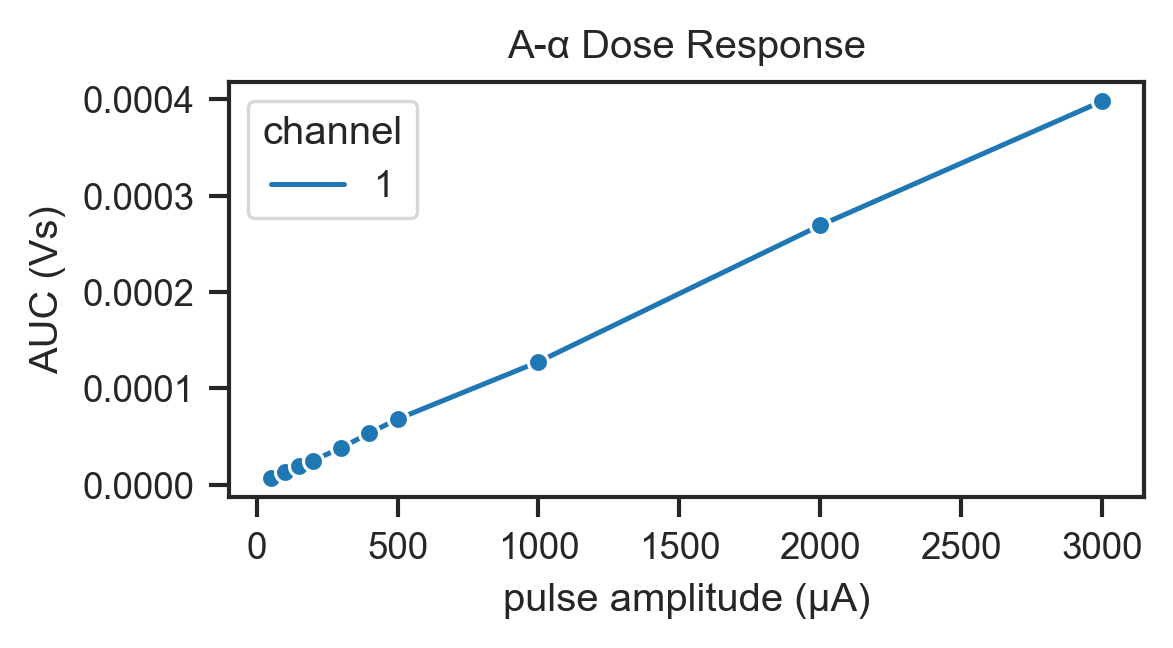

In [11]:
fig, ax = plt.subplots(1, dpi=300, figsize=(4,9./4))

sns.lineplot(x="pulse amplitude (μA)", y='AUC (Vs)',
             marker='o',
             estimator=np.mean,
             ci=0,
             hue="channel",
             data=df[(df["Calculation Window"] == "A-alpha") &
                     (df["Calculation Type"] == "RMS")], ax=ax)

ax.set_title('A-α Dose Response')
plt.tight_layout()
plt.show()

In [3]:
data_stim = pyeCAP.Stim(file_location)

read from t=0s to t=153.36s


In [7]:
data_ecap=pyeCAP.ECAP(data_ephys, data_stim)

c:\users\malal\documents\witne\pycap\eba-toolkit\eba_toolkit\ecap.py:61: UserWarning: Neural channels not implicitly stated. Assuming all channels are neural recordings
  warnings.warn("Neural channels not implicitly stated. Assuming all channels are neural recordings")


In [13]:
data_ecap.plot_channel("Stim 1", [(0,1)])

[(0, 1)]


IndexError: Index is not smaller than dimension 0 >= 0

In [11]:
data_stim.parameters

onset time (s)  offset time (s)  period (ms)  frequency (Hz)  \
0 0       55.625687        56.626135    40.017918       24.988806   
  1       65.625702        66.626150    40.017918       24.988806   
  2       75.625718        76.626166    40.017918       24.988806   
  3       85.625733        86.626181    40.017918       24.988806   
  4       95.625748        96.626196    40.017918       24.988806   
  5      105.625764       106.626212    40.017918       24.988806   
  6      115.625779       116.626227    40.017918       24.988806   
  7      125.625795       126.626243    40.017918       24.988806   
  8      135.625810       136.626258    40.017918       24.988806   
  9      145.625825       146.626273    40.017918       24.988806   

     pulse count  pulse amplitude (μA)  duration (ms)  pulse duration (ms)  \
0 0           25               -2000.0    1000.447941                  0.4   
  1           25                -200.0    1000.447941                  0.4   
  2           25               -3000.0    1000.447941                  0.4   
  3           25                -500.0    1000.447941                  0.4   
  4           25                -300.0    1000.447941                  0.4   
  5           25                -150.0    1000.447941                  0.4   
  6           25                -400.0    1000.447941                  0.4   
  7           25               -1000.0    1000.447941                  0.4   
  8           25                -100.0    1000.447941                  0.4   
  9           25                 -50.0    1000.447941                  0.4   

     interphase delay (ms)  channel  
0 0                    0.0        1  
  1                    0.0        1  
  2                    0.0        1  
  3                    0.0        1  
  4                    0.0        1  
  5                    0.0        1  
  6                    0.0        1  
  7                    0.0        1  
  8                    0.0        1  
  9                    0.0        1